In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive

/content/drive/My Drive


In [3]:
import pandas as pd
import numpy as np
import random
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings;
warnings.filterwarnings('ignore')

In [4]:
#reading dataset
df = pd.read_csv('preprocessed_file.csv', encoding = 'latin',engine='python')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   target   1600000 non-null  int64 
 1   content  1592549 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [5]:
#check for missing values
print(df.isnull().sum())
# remove missing values
df.dropna(inplace=True)


target        0
content    7451
dtype: int64


In [6]:
#divide 70-30% in train and test vectors
X_train, X_test, y_train, y_test = train_test_split(df['content'],df['target'], test_size=0.3)
print('Shape of X_train pad tensor',len(X_train))
print('Shape of y_train tensor',len(y_train))
print('Shape of X_test tensor',len(X_test))
print('Shape of y_test tensor',len(y_test))

Shape of X_train pad tensor 1114784
Shape of y_train tensor 1114784
Shape of X_test tensor 477765
Shape of y_test tensor 477765


In [7]:
# Generate counts from text using a vectorizer (Document term matrix)
vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1,2), binary=True, max_df=0.8, min_df=5e-6)
train_features = vectorizer.fit_transform([r for r in X_train])
print('Train Vocabulary shape :',train_features.shape)
#print(vectorizer.vocabulary_)
test_features = vectorizer.transform([r for r in X_test])
print('Test Vocabulary shape :',test_features.shape)
#print(vectorizer.vocabulary_)


Train Vocabulary shape : (1114784, 147583)
Test Vocabulary shape : (477765, 147583)


In [8]:
clf1 = LogisticRegression(max_iter=1000)
clf1.fit(train_features, y_train)

# Now we can use the model to predict classifications for our test features.
predictions = clf1.predict(test_features)

# Compute the error.Results after classification
matrix = confusion_matrix(y_test, predictions)
accuracy=accuracy_score(y_test, predictions)
precision=precision_score(y_test, predictions)
recall=recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Logistic Regression ")
print("Accuracy  : {:.4f}%".format(accuracy*100))
print("Precision : {:.4f}%".format(precision*100))
print("Recall    : {:.4f}%".format(recall*100))
print("F1-measure: {:.4f}%".format(f1*100))


Logistic Regression 
Accuracy  : 77.9369%
Precision : 76.8227%
Recall    : 79.9572%
F1-measure: 78.3586%


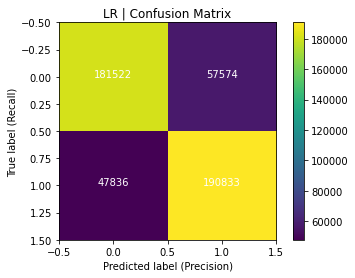

In [9]:
plt.imshow(matrix, interpolation='nearest')

for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(j, i, matrix[i, j],horizontalalignment="center",color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('LR | Confusion Matrix')
plt.colorbar()

In [11]:
clf2 = LinearSVC()
clf2.fit(train_features, y_train)

# Now we can use the model to predict classifications for our test features.
predictions = clf2.predict(test_features)

# Compute the error.Results after classification
matrix = confusion_matrix(y_test, predictions)
accuracy=accuracy_score(y_test, predictions)
precision=precision_score(y_test, predictions)
recall=recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Linear SVC ")
print("Accuracy  : {:.4f}%".format(accuracy*100))
print("Precision : {:.4f}%".format(precision*100))
print("Recall    : {:.4f}%".format(recall*100))
print("F1-measure: {:.4f}%".format(f1*100))


Linear SVC 
Accuracy  : 76.7082%
Precision : 75.6486%
Recall    : 78.7124%
F1-measure: 77.1501%


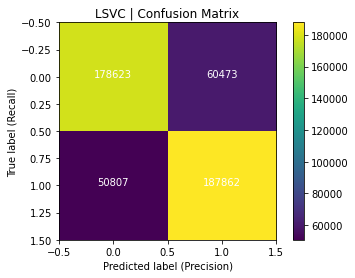

In [12]:
plt.imshow(matrix, interpolation='nearest')

for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(j, i, matrix[i, j],horizontalalignment="center",color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('LSVC | Confusion Matrix')
plt.colorbar()

In [14]:
clf3=MultinomialNB()
clf3.fit(train_features, y_train)

# Now we can use the model to predict classifications for our test features.
predictions = clf3.predict(test_features)

# Compute the error.Results after classification
matrix = confusion_matrix(y_test, predictions)
accuracy=accuracy_score(y_test, predictions)
precision=precision_score(y_test, predictions)
recall=recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Multinomial Naive Bayes ")
print("Accuracy  : {:.4f}%".format(accuracy*100))
print("Precision : {:.4f}%".format(precision*100))
print("Recall    : {:.4f}%".format(recall*100))
print("F1-measure: {:.4f}%".format(f1*100))

Multinomial Naive Bayes 
Accuracy  : 76.4483%
Precision : 75.8711%
Recall    : 77.5019%
F1-measure: 76.6778%


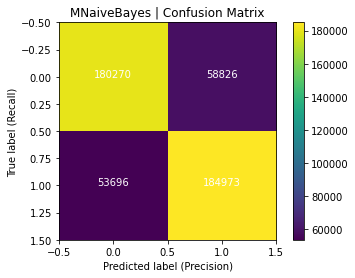

In [15]:
plt.imshow(matrix, interpolation='nearest')

for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(j, i, matrix[i, j],horizontalalignment="center",color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('MNaiveBayes | Confusion Matrix')
plt.colorbar()

In [ ]:
# clf4 = DecisionTreeClassifier()
# clf4.fit(train_features, y_train)

# # Now we can use the model to predict classifications for our test features.
# predictions = clf4.predict(test_features)

# # Compute the error.Results after classification
# matrix = confusion_matrix(y_test, predictions)
# accuracy=accuracy_score(y_test, predictions)
# precision=precision_score(y_test, predictions)
# recall=recall_score(y_test, predictions)
# f1 = f1_score(y_test, predictions)

# print("DecisionTree Classifier ")
# print("Accuracy  : {:.4f}%".format(accuracy*100))
# print("Precision : {:.4f}%".format(precision*100))
# print("Recall    : {:.4f}%".format(recall*100))
# print("F1-measure: {:.4f}%".format(f1*100))

In [ ]:
# plt.imshow(matrix, interpolation='nearest')

# for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
#     plt.text(j, i, matrix[i, j],horizontalalignment="center",color="white")

# plt.ylabel('True label (Recall)')
# plt.xlabel('Predicted label (Precision)')
# plt.title('Decision Tree | Confusion Matrix')
# plt.colorbar()

In [ ]:
# clf5 = RandomForestClassifier(n_estimators=1000, random_state=42)
# clf5.fit(train_features, y_train)

# # Now we can use the model to predict classifications for our test features.
# predictions = clf5.predict(test_features)

# # Compute the error.Results after classification
# matrix = confusion_matrix(y_test, predictions)
# accuracy=accuracy_score(y_test, predictions)
# precision=precision_score(y_test, predictions)
# recall=recall_score(y_test, predictions)
# f1 = f1_score(y_test, predictions)

# print("Random Forest ")
# print("Accuracy  : {:.4f}%".format(accuracy*100))
# print("Precision : {:.4f}%".format(precision*100))
# print("Recall    : {:.4f}%".format(recall*100))
# print("F1-measure: {:.4f}%".format(f1*100))

In [ ]:
# plt.imshow(matrix, interpolation='nearest')

# for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
#     plt.text(j, i, matrix[i, j],horizontalalignment="center",color="white")

# plt.ylabel('True label (Recall)')
# plt.xlabel('Predicted label (Precision)')
# plt.title('RandomForest | Confusion Matrix')
# plt.colorbar()

In [ ]:
# clf6 = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3)
# clf6.fit(train_features, y_train)

# # Now we can use the model to predict classifications for our test features.
# predictions = clf6.predict(test_features)

# # Compute the error.Results after classification
# matrix = confusion_matrix(y_test, predictions)
# accuracy=accuracy_score(y_test, predictions)
# precision=precision_score(y_test, predictions)
# recall=recall_score(y_test, predictions)
# f1 = f1_score(y_test, predictions)

# print("XGB Classifier")
# print("Accuracy  : {:.4f}%".format(accuracy*100))
# print("Precision : {:.4f}%".format(precision*100))
# print("Recall    : {:.4f}%".format(recall*100))
# print("F1-measure: {:.4f}%".format(f1*100))



In [ ]:
# plt.imshow(matrix, interpolation='nearest')

# for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
#     plt.text(j, i, matrix[i, j],horizontalalignment="center",color="white")

# plt.ylabel('True label (Recall)')
# plt.xlabel('Predicted label (Precision)')
# plt.title('XGB Classifier | Confusion Matrix')
# plt.colorbar()